In [9]:
# 1. Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set visualization style
sns.set(style="whitegrid")


In [11]:
# 2. Load the Titanic Dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Display first 5 rows
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# 3. Basic Summary Statistics
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# 4. Check Data Types and Null Values
print(df.info())
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None

Missing values per column:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


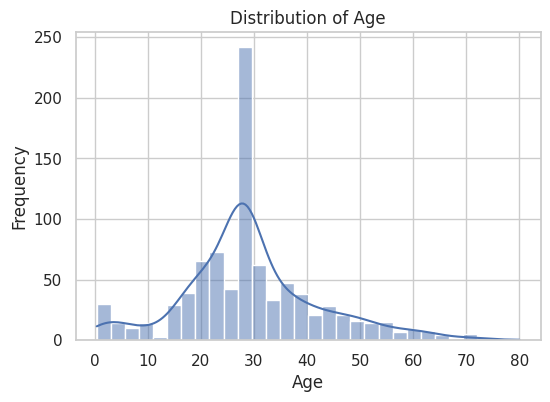

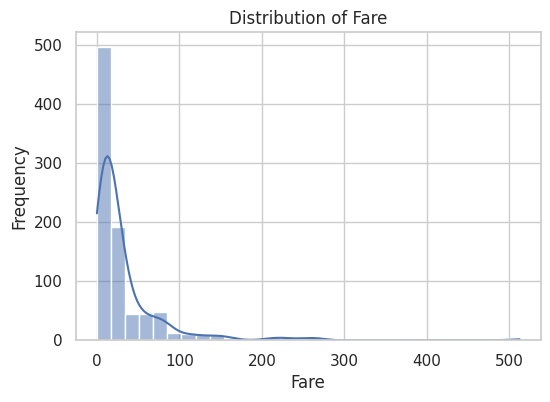

In [18]:
# 5. Visualize Distribution of Numeric Features
numeric_cols = ['Age', 'Fare']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


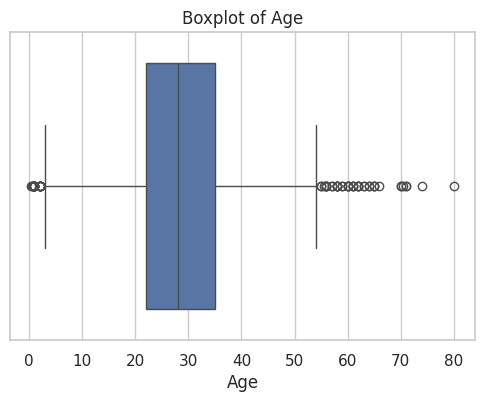

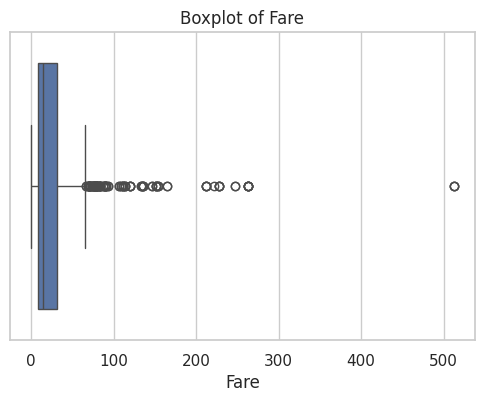

In [19]:
# 6. Boxplots to Detect Outliers
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


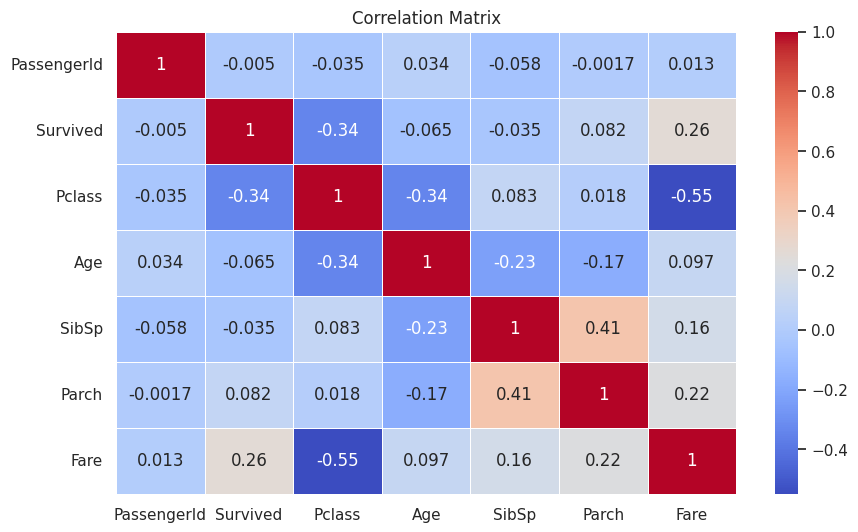

In [20]:
# 7. Correlation Matrix
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


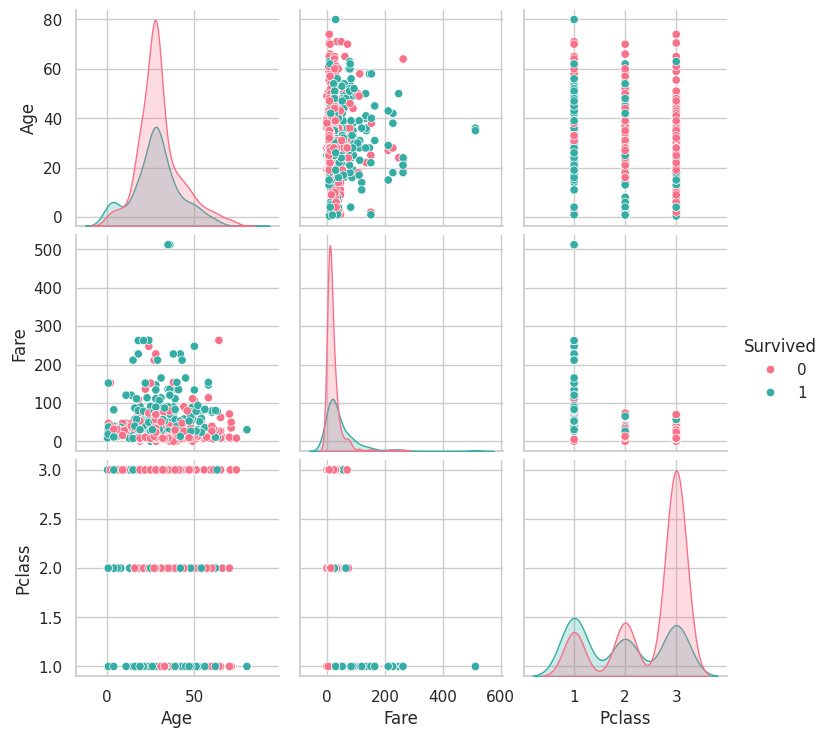

In [21]:
# 8. Pairplot of Key Variables
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass', 'Sex']],
             hue='Survived', palette='husl')
plt.show()



<ipython-input-22-0b5ca69536a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


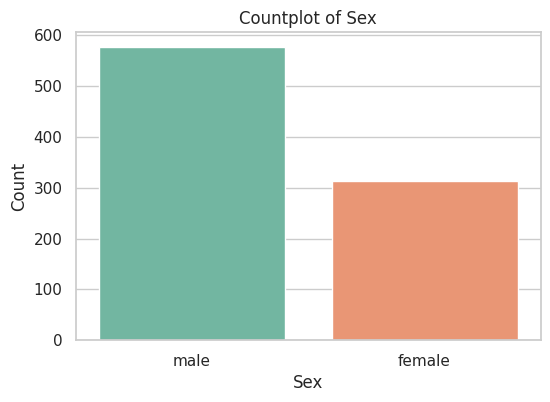

<ipython-input-22-0b5ca69536a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


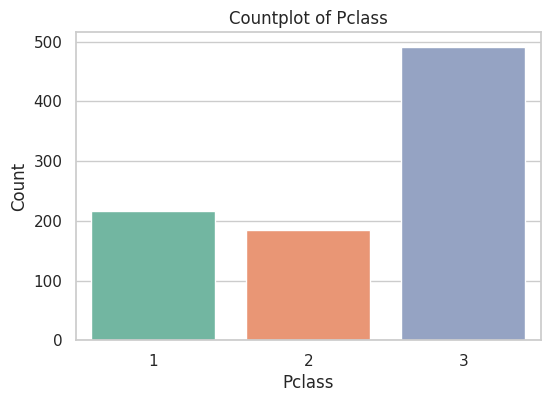

<ipython-input-22-0b5ca69536a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


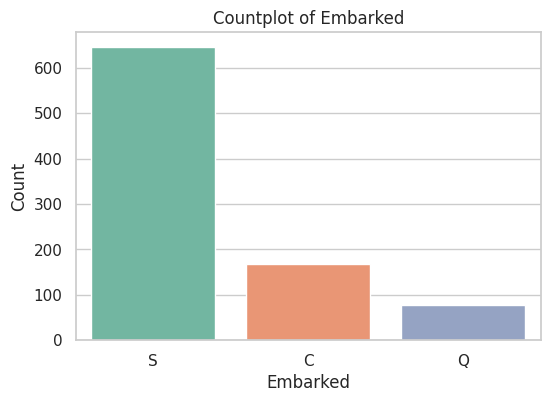

<ipython-input-22-0b5ca69536a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


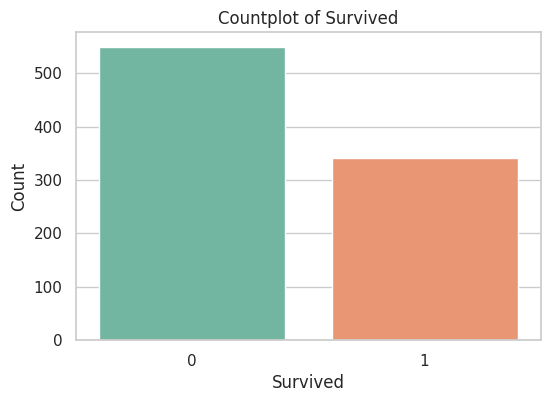

In [22]:
# 9. Countplots for Categorical Features
categorical_cols = ['Sex', 'Pclass', 'Embarked', 'Survived']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


<ipython-input-23-aa71516d6681>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=survival_rate_by_gender, x='Sex', y='Survived', palette='Set2')


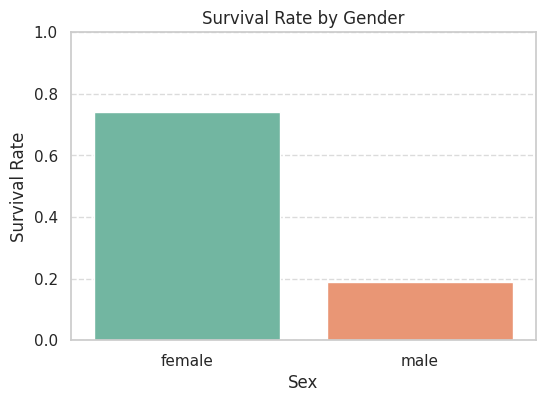

In [23]:
survival_rate_by_gender = df.groupby('Sex')['Survived'].mean().reset_index()

# Plot survival rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(data=survival_rate_by_gender, x='Sex', y='Survived', palette='Set2')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Final Observations from Visualizations

Based on the exploratory data analysis of the Titanic dataset, the following key insights were observed:

- **Survival Rate by Gender**: Females had a significantly higher survival rate compared to males.
- **Survival Rate by Passenger Class (Pclass)**: Passengers in 1st class had the highest survival rate, while those in 3rd class had the lowest.
- **Age Distribution**: Most passengers were between 20 and 40 years old. Children had slightly better survival chances.
- **Fare Distribution**: Higher fares were generally associated with higher survival rates, indicating wealthier passengers had better chances.
- **Correlation Analysis**: Stronger survival correlations were seen with `Sex`, `Pclass`, and `Fare`.

These insights can help in selecting important features for building predictive models in later stages.
